In [9]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import missingno

In [2]:
df = pd.read_csv("automobile.txt",sep=",")

In [95]:
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [172]:
df.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

<AxesSubplot:>

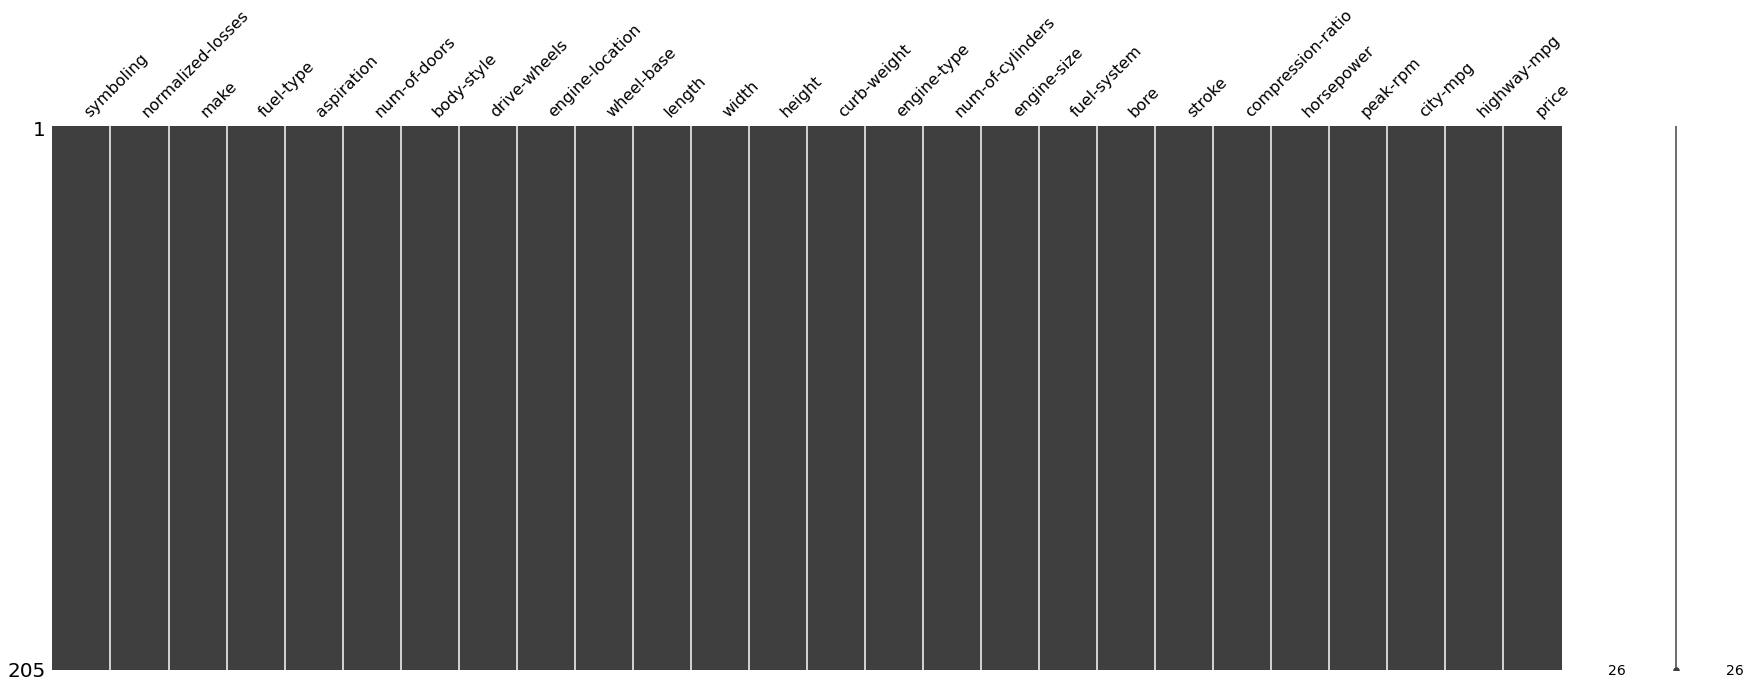

In [22]:
# We use the missingno package to check for missing values in our dataframe
missingno.matrix(df, figsize = (30,10))

It looks like there are no missing values, but if we look in the dataframe we can see that there are values of "?" which can represent missing data as well. We will replace the "?" values with NaN  so we can have a more accurate graph of the missing data.

In [26]:
df.replace("?",np.nan,inplace=True)

<AxesSubplot:>

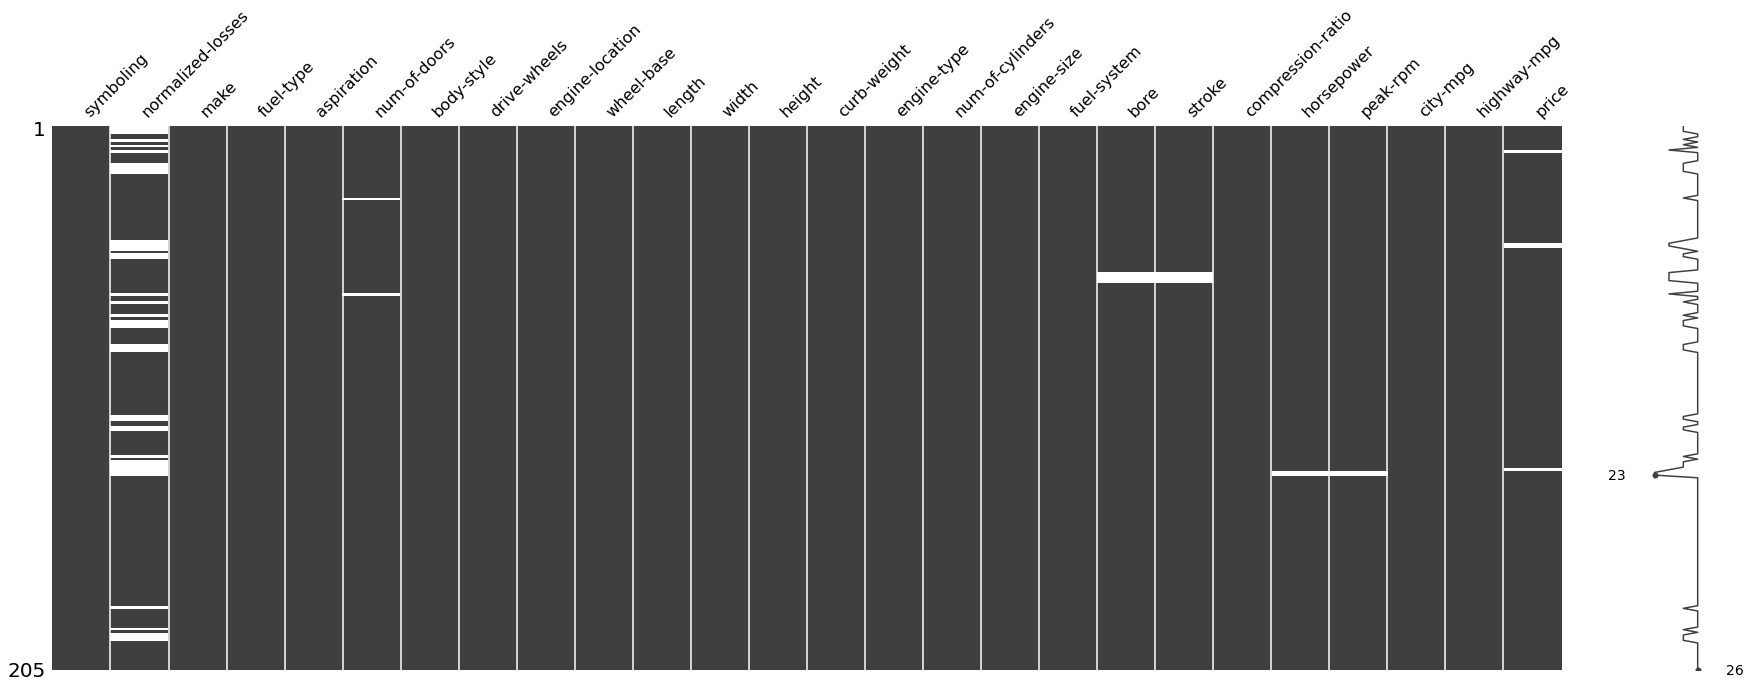

In [27]:
missingno.matrix(df, figsize = (30,10))

Now we can see that there is actauly missing data in our dataframe
 - The normalized-losses column has 41 missing values out of 205 total, we can drop the entire column since 20% of the data is missing.
 - The price, horsepower and peak-rpm columns have some missing values as well, but  we can remove just the rows with the missing data since we can't predict or replace the missing values.

In [44]:
df.drop("normalized-losses",axis=1,inplace=True)
df.dropna(subset=["price","horsepower","peak-rpm"],axis=0,inplace=True)

 - There are 2 values missing for num-of-doors, we can replace those with the more frequent since they are categorical data
 - There are 8 values missing from the bore and stroke columns, those can be replaced with the average of the column.

In [74]:
df["num-of-doors"].replace(np.nan,df["num-of-doors"].mode,inplace=True)

In [100]:
# Before we replace the data for the "bore" and "stroke" columsn we need to transform it into numerical type of data.
df["bore"] = df["bore"].astype(float)
df["stroke"] = df["stroke"].astype(float)
df["price"] = df["price"].astype(int)

df["bore"].replace(np.nan,df["bore"].mean(),inplace=True)
df["stroke"].replace(np.nan,df["stroke"].mean(),inplace=True)

### Now all data is cleaned, and we have no more missing values

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


<AxesSubplot:xlabel='count', ylabel='body-style'>

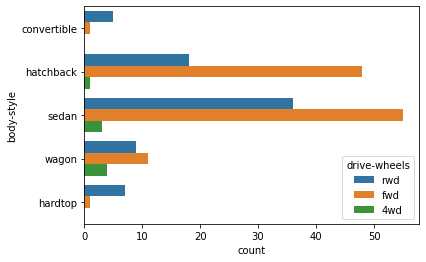

In [98]:
sns.countplot(y="body-style",data=df,hue='drive-wheels')

From the plot, we can observe that the most popular are sedan cars, and the front wheels drive is predominantly across most body styles. On the other hand, convertibles and hardtops have predominantly rear-wheel drive.

<AxesSubplot:xlabel='fuel-type', ylabel='highway-mpg'>

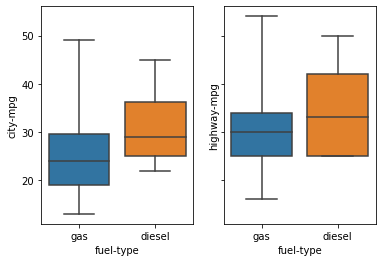

In [109]:
f, axes = plt.subplots(1, 2,sharey=True)
sns.boxplot(x="fuel-type",y = "city-mpg", data = df,whis=3,ax=axes[0])
sns.boxplot(x="fuel-type",y = "highway-mpg", data = df,whis=3,ax=axes[1])

The above plots show the fuel economy difference between gas and diesel cars, we can see that for highways, a diesel car would be more economical since the lower threshold is higher than the gas cars.

<AxesSubplot:xlabel='engine-size', ylabel='price'>

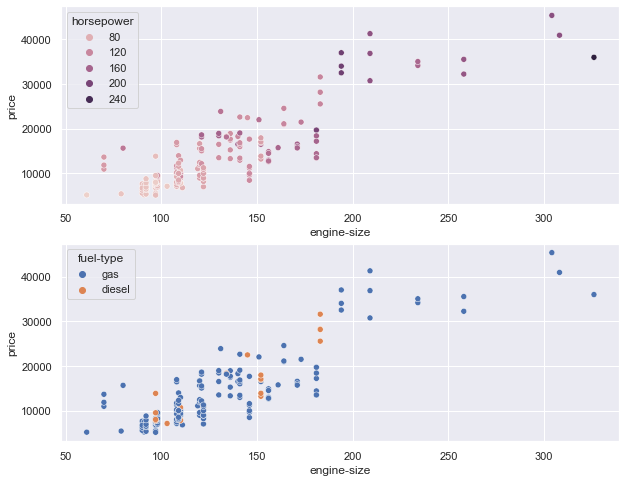

In [163]:
#Change data type to numerical for  horsepower and peak-rpm
df = df.astype({"horsepower":int,"peak-rpm":int})

f,axes = plt.subplots(2,1)
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(x="engine-size",y="price",data=df,hue="horsepower",ax=axes[0])
sns.scatterplot(x="engine-size",y="price",data=df,hue="fuel-type",ax=axes[1])

This plot shows the correlation between the price and the engine size.
Also, it can be observed which type of fuel, and how much horsepower the car has.